<a href="https://colab.research.google.com/github/msaantonova/ADS_2024/blob/master/Applied_ML_Movie_Spoiler_Detection_Group_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Applied ML - Movie Spoiler Detection**

## Group 5: Arina Antonova, Anastasiya Saputo, Juliana Schöner, Milica Djordjevic

### Project Description
The project ...


### Workflow

1.   Loading the Dataset
2.   Analysing the Dataset
3.   Classical ML
  1.   Decision Tree    
  2.   Random Forest
  3.   Naive Bayes
4.   NLMs
  1.   Fine-tuning general pre-trained model
  2.   Fine-tuning fine-tuned model on spoiler detection
5. Comparison

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **1. Loading Datasets**

Misra, Rishabh. "IMDB Spoiler Dataset." DOI: 10.13140/RG.2.2.11584.15362 (2019).

The files should be uploaded left in the "files" directory

In [5]:
import pandas as pd
import zipfile
import os
from google.colab import files

### Dataset with plot summaries

In [6]:
import json

file_path1 = '/content/IMDB_movie_details.json'
with open(file_path1, 'r', encoding='utf-8') as f:
    for i in range(5):
        print(f.readline())

{"movie_id": "tt0105112", "plot_summary": "Former CIA analyst, Jack Ryan is in England with his family on vacation when he suddenly witnesses an explosion outside Buckingham Palace. It is revealed that some people are trying to abduct a member of the Royal Family but Jack intervenes, killing one of them and capturing the other, and stops the plan in its tracks. Afterwards, he learns that they're Irish revolutionaries and the two men are brothers. During his court hearing the one that's still alive vows to get back at Jack but is sentenced and that seems to be the end of it. However, whilst the man is being transported, he is broken out. Jack learns of this but doesn't think there's anything to worry about. But, when he is at the Naval Academy someone tries to kill him. He learns that they are also going after his family and so he rushes to find them, safe but having also been the victims of a failed assassination. That's when Jack decides to rejoin the CIA, and they try to find the man

In [7]:
df_plot_summaries = pd.read_json(file_path1, lines=True)

In [8]:
df_plot_summaries.tail()

,movie_id,plot_summary,duration,genre,rating,release_date,plot_synopsis
1567,tt0289879,Evan Treborn grows up in a small town with his...,1h 53min,"[Sci-Fi, Thriller]",7.7,2004-01-23,"In the year 1998, Evan Treborn (Ashton Kutcher..."
1568,tt1723811,Brandon is a 30-something man living in New Yo...,1h 41min,[Drama],7.2,2012-01-13,"Brandon (Michael Fassbender) is a successful, ..."
1569,tt5013056,Evacuation of Allied soldiers from the British...,1h 46min,"[Action, Drama, History]",8.1,2017-07-21,The film alternates between three different pe...
1570,tt0104014/,"For a while now, beautiful 24-year-old Diana B...",1h 33min,"[Comedy, Drama]",5.3,1992-02-21,
1571,tt0114142/,"The marriage of David Burgess, a senior execut...",1h 32min,"[Drama, Thriller]",4.0,1999-01-29,


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['rating'].plot(kind='hist', bins=20, title='rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('movie_id').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('plot_summary').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('duration').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('release_date').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='index', y='rating', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['rating']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('movie_id')):
  _plot_series(series, series_name, i)
  fig.legend(title='movie_id', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('rating')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['rating']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('plot_summary')):
  _plot_series(series, series_name, i)
  fig.legend(title='plot_summary', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('rating')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['rating']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('duration')):
  _plot_series(series, series_name, i)
  fig.legend(title='duration', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('rating')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['rating']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('release_date')):
  _plot_series(series, series_name, i)
  fig.legend(title='release_date', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('rating')

from matplotlib import pyplot as plt
_df_11['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['rating'].plot(kind='line', figsize=(8, 4), title='rating')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['plot_summary'].value_counts()
    for x_label, grp in _df_13.groupby('movie_id')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('movie_id')
_ = plt.ylabel('plot_summary')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['duration'].value_counts()
    for x_label, grp in _df_14.groupby('plot_summary')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('plot_summary')
_ = plt.ylabel('duration')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['release_date'].value_counts()
    for x_label, grp in _df_15.groupby('duration')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('duration')
_ = plt.ylabel('release_date')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['plot_synopsis'].value_counts()
    for x_label, grp in _df_16.groupby('release_date')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('release_date')
_ = plt.ylabel('plot_synopsis')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['movie_id'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='index', y='movie_id', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_18['plot_summary'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_18, x='index', y='plot_summary', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_19['duration'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_19, x='index', y='duration', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_20['release_date'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_20, x='index', y='release_date', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

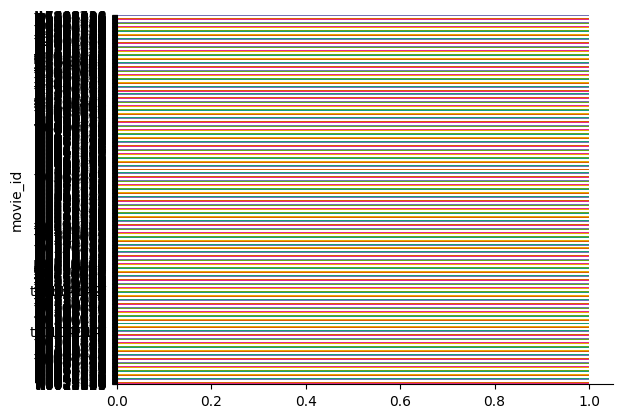

In [10]:
from matplotlib import pyplot as plt
import seaborn as sns
df_plot_summaries.groupby('movie_id').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [11]:
df_plot_summaries['plot_summary'][0]

"Former CIA analyst, Jack Ryan is in England with his family on vacation when he suddenly witnesses an explosion outside Buckingham Palace. It is revealed that some people are trying to abduct a member of the Royal Family but Jack intervenes, killing one of them and capturing the other, and stops the plan in its tracks. Afterwards, he learns that they're Irish revolutionaries and the two men are brothers. During his court hearing the one that's still alive vows to get back at Jack but is sentenced and that seems to be the end of it. However, whilst the man is being transported, he is broken out. Jack learns of this but doesn't think there's anything to worry about. But, when he is at the Naval Academy someone tries to kill him. He learns that they are also going after his family and so he rushes to find them, safe but having also been the victims of a failed assassination. That's when Jack decides to rejoin the CIA, and they try to find the man before he makes another attempt.         

### Dataset with spoilers

In [12]:
file_path2 = '/content/IMDB_reviews.json'
with open(file_path2, "r", encoding="utf-8") as f:
    for i in range(5):
        print(f.readline())

{"review_date": "10 February 2006", "movie_id": "tt0111161", "user_id": "ur1898687", "is_spoiler": true, "review_text": "In its Oscar year, Shawshank Redemption (written and directed by Frank Darabont, after the novella Rita Hayworth and the Shawshank Redemption, by Stephen King) was nominated for seven Academy Awards, and walked away with zero. Best Picture went to Forrest Gump, while Shawshank and Pulp Fiction were \"just happy to be nominated.\" Of course hindsight is 20/20, but while history looks back on Gump as a good film, Pulp and Redemption are remembered as some of the all-time best. Pulp, however, was a success from the word \"go,\" making a huge splash at Cannes and making its writer-director an American master after only two films. For Andy Dufresne and Co., success didn't come easy. Fortunately, failure wasn't a life sentence.After opening on 33 screens with take of $727,327, the $25M film fell fast from theatres and finished with a mere $28.3M. The reasons for failure ar

Apparently. json file is invalid in some lines, so we need to clean the data

In [13]:
import json

fixed_lines = []
with open(file_path2, "r", encoding="utf-8") as f:
    for line in f:
        try:
            fixed_lines.append(json.loads(line.strip()))  # Parse each line safely
        except json.JSONDecodeError:
            print("Skipping bad line:", line)

In [14]:
df_spoilers = pd.DataFrame(fixed_lines)

In [15]:
df_spoilers.tail()

,review_date,movie_id,user_id,is_spoiler,review_text,rating,review_summary
573908,8 August 1999,tt0139239,ur0100166,False,"Go is wise, fast and pure entertainment. Assem...",10,The best teen movie of the nineties
573909,31 July 1999,tt0139239,ur0021767,False,"Well, what shall I say. this one´s fun at any ...",9,Go - see the movie
573910,20 July 1999,tt0139239,ur0392750,False,"Go is the best movie I have ever seen, and I'v...",10,It's the best movie I've ever seen
573911,11 June 1999,tt0139239,ur0349105,False,Call this 1999 teenage version of Pulp Fiction...,3,Haven't we seen this before?
573912,3 May 1999,tt0139239,ur0156431,False,Why was this movie made? No doubt to sucker in...,2,Go doesn't go anywhere


In [16]:
df_spoilers['review_text'][0]

'In its Oscar year, Shawshank Redemption (written and directed by Frank Darabont, after the novella Rita Hayworth and the Shawshank Redemption, by Stephen King) was nominated for seven Academy Awards, and walked away with zero. Best Picture went to Forrest Gump, while Shawshank and Pulp Fiction were "just happy to be nominated." Of course hindsight is 20/20, but while history looks back on Gump as a good film, Pulp and Redemption are remembered as some of the all-time best. Pulp, however, was a success from the word "go," making a huge splash at Cannes and making its writer-director an American master after only two films. For Andy Dufresne and Co., success didn\'t come easy. Fortunately, failure wasn\'t a life sentence.After opening on 33 screens with take of $727,327, the $25M film fell fast from theatres and finished with a mere $28.3M. The reasons for failure are many. Firstly, the title is a clunker. While iconic to fans today, in 1994, people knew not and cared not what a \'Shaws

### Creating one common dataset

In [17]:
combined_df = pd.merge(df_spoilers, df_plot_summaries, on='movie_id')

combined_df.tail()

,review_date,movie_id,user_id,is_spoiler,review_text,rating_x,review_summary,plot_summary,duration,genre,rating_y,release_date,plot_synopsis
573901,8 August 1999,tt0139239,ur0100166,False,"Go is wise, fast and pure entertainment. Assem...",10,The best teen movie of the nineties,"Told from three perspectives, a story of a bun...",1h 42min,"[Comedy, Crime]",7.3,1999-04-09,"The film is told out of chronological format, ..."
573902,31 July 1999,tt0139239,ur0021767,False,"Well, what shall I say. this one´s fun at any ...",9,Go - see the movie,"Told from three perspectives, a story of a bun...",1h 42min,"[Comedy, Crime]",7.3,1999-04-09,"The film is told out of chronological format, ..."
573903,20 July 1999,tt0139239,ur0392750,False,"Go is the best movie I have ever seen, and I'v...",10,It's the best movie I've ever seen,"Told from three perspectives, a story of a bun...",1h 42min,"[Comedy, Crime]",7.3,1999-04-09,"The film is told out of chronological format, ..."
573904,11 June 1999,tt0139239,ur0349105,False,Call this 1999 teenage version of Pulp Fiction...,3,Haven't we seen this before?,"Told from three perspectives, a story of a bun...",1h 42min,"[Comedy, Crime]",7.3,1999-04-09,"The film is told out of chronological format, ..."
573905,3 May 1999,tt0139239,ur0156431,False,Why was this movie made? No doubt to sucker in...,2,Go doesn't go anywhere,"Told from three perspectives, a story of a bun...",1h 42min,"[Comedy, Crime]",7.3,1999-04-09,"The film is told out of chronological format, ..."


## **2. Analysing Dataset**

### Percentage of spoilers in the dataset

In [18]:
import matplotlib.pyplot as plt

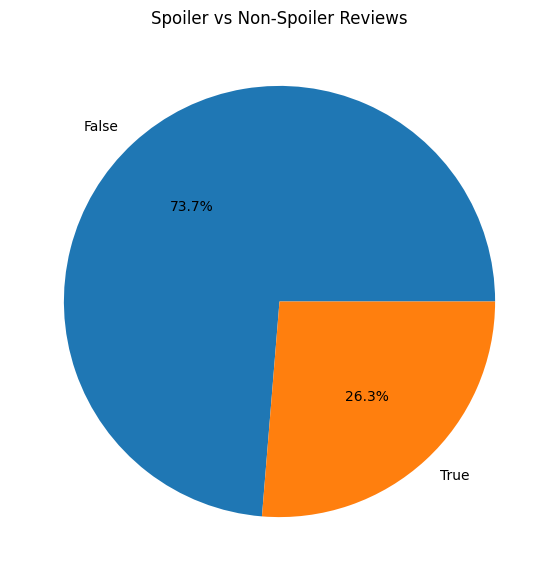

In [19]:
df = combined_df.groupby("is_spoiler").size()  # Count occurrences of True/False
df.plot.pie(y=df.values, labels=df.index, autopct='%1.1f%%', figsize=(7,7))
plt.title("Spoiler vs Non-Spoiler Reviews")
plt.ylabel("")  # Hide the default ylabel
plt.show()

### Percentage of spoilers per genre in the dataset

           spoilers_count  total_count  spoiler_percentage
genre                                                     
Sci-Fi              29823        95550           31.211931
Horror              13879        46784           29.666125
Mystery             18541        64051           28.947245
Adventure           53734       187293           28.689807
Action              53897       190717           28.260197
Fantasy             21694        77098           28.138214
Thriller            26771        95221           28.114597
Film-Noir             488         1791           27.247348
Family              10702        39559           27.053262
Animation            6834        26597           25.694627
Drama               74230       289360           25.653166
Western              1209         4741           25.500949
Crime               27011       109670           24.629343
War                  2486        10228           24.305827
Biography            7992        33107           24.1399

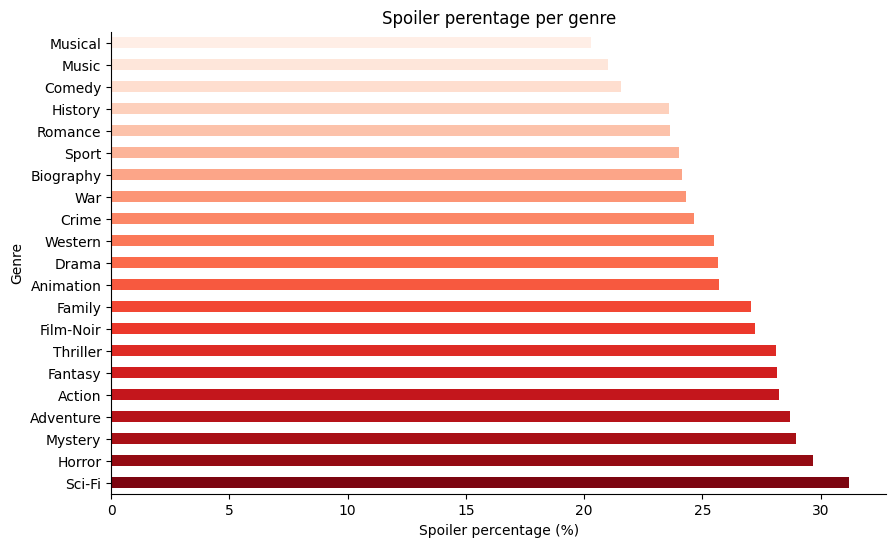

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

combined_df_exploded['is_spoiler'] = combined_df_exploded['is_spoiler'].astype(bool)

# We divide the genres if there is a list of them
combined_df_exploded = combined_df_exploded.explode('genre')

# Group by genre and count the number of spoilers for each
genre_spoiler_counts = combined_df_exploded.groupby('genre')['is_spoiler'].sum()
genre_counts = combined_df_exploded['genre'].value_counts()

genre_stats = pd.DataFrame({
    'spoilers_count': genre_spoiler_counts,
    'total_count': genre_counts
})

genre_stats['spoiler_percentage'] = (genre_stats['spoilers_count'] / genre_stats['total_count']) * 100

# Sort by % spoilers
genre_stats = genre_stats.sort_values(by='spoiler_percentage', ascending=False)
print(genre_stats)


plt.figure(figsize=(10, 6))
genre_stats['spoiler_percentage'].plot(kind='barh', color=sns.color_palette('Reds_r', len(genre_stats)))


plt.xlabel("Spoiler percentage (%)")
plt.ylabel("Genre")
plt.title("Spoiler perentage per genre")
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()


### Most common word for spoilers

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re # Import the 're' module for regular expressions
from collections import Counter # Import the 'Counter' class

combined_df_exploded['is_spoiler'] = combined_df_exploded['is_spoiler'].astype(bool)

spoiler_reviews = combined_df_exploded[combined_df_exploded['is_spoiler'] == True]

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    return text

spoiler_reviews['processed_text'] = spoiler_reviews['review_text'].apply(preprocess_text) # Changed 'review' to 'review_text'

all_words = ' '.join(spoiler_reviews['processed_text']).split()

word_counts = Counter(all_words)

most_common_word, most_common_count = word_counts.most_common(1)[0]

print(f"The most common word in spoiler reviews: '{most_common_word}' with frequency {most_common_count}")


<ipython-input-42-3ba45ba80828>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spoiler_reviews['processed_text'] = spoiler_reviews['review_text'].apply(preprocess_text) # Changed 'review' to 'review_text'


In [ ]:
top_10_words = word_counts.most_common(10)

words, counts = zip(*top_10_words)
plt.figure(figsize=(10, 6))
plt.barh(words, counts, color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.title('Top-10 most common words in spoiler reviews')
plt.gca().invert_yaxis()
plt.show()

### Average length of a spolier

### Average number of names in spoilers

## **Classical Machine Learning Algorythms**

### NLTK Clasifier - code from Liad's exercise

In [ ]:
import nltk

In [ ]:
def gender_features(first_name: str) -> dict[str, float]:
  # Which features can we use to detect the a spoiler?
  # Craft at least one feature and return it as a feature dictionary
  first_letter_unicode = ord(first_name[0])
  last_letter_unicode = ord(first_name[-1])
  name_length = len(first_name)
  for female_ending in unique_female_endings:
    if first_name[-3:] == female_ending:
      ends_with_unique_female_endings = 1
      break
    else:
      ends_with_unique_female_endings = 0

  for male_ending in unique_male_endings:
    if first_name[-3:] == male_ending:
      ends_with_unique_male_endings = 1
      break
    else:
      ends_with_unique_male_endings = 0

#ends_with_unique_female_endings = 1 if any(first_name.endswith(ending) for ending in unique_female_endings) else 0 # for female names
#ends_with_unique_male_endings = 1 if any(first_name.endswith(ending) for ending in unique_male_endings) else 0 # for male names

  return {
      'first_letter_unicode': first_letter_unicode,
      'last_letter_unicode': last_letter_unicode,
      'name_length': name_length,
      'ends_with_unique_female_endings': ends_with_unique_female_endings,
      'ends_with_unique_male_endings': ends_with_unique_female_endings
      }

In [ ]:
# function check
print(gender_features('Abagael'))
print(gender_features('Aaron'))

In [ ]:
feature_sets = [(gender_features(first_name), gender) for (first_name, gender) in labeled_names]

# We split the dataset to create a previously unseen 'exam' for the model:
train_set, test_set = feature_sets[500:], feature_sets[:500]

# And then, define and train the NLTK classifier
name_classifier = nltk.DecisionTreeClassifier.train(train_set)

In [ ]:
for name in ["Bill", "Melissa", "Barack", "Michelle", "Joe", "Jill", "Donald", "Ivanka"]:
  predicted_gender = name_classifier.classify(gender_features(name))
  print(f"the gender prediction for {name} is {predicted_gender}")

In [ ]:
print(nltk.classify.accuracy(name_classifier, test_set))

In [ ]:
print(name_classifier.pretty_format())

### Decision Tree from Scikit-Learn - code from Liad's homework

In [ ]:
import numpy as np

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from matplotlib import pyplot as plt

In [ ]:
# Maps to convert labels into numerical ids:

label2idx = {'male':0, 'female': 1}
idx2label = {0: 'male', 1: 'female'}

In [ ]:
X = male_names + female_names
y = [label2idx['male']] * len(male_names) + [label2idx['female']] * len(female_names)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=1234, stratify=y)

In [ ]:
assert len(X_train) == len(y_train)
assert len(X_test) == len(y_test)

In [ ]:
# Initializing Decision Tree:
clf = tree.DecisionTreeClassifier(max_depth=2, random_state=1234)

In [ ]:
#And of course, we need our Feature Function again.
#However, unlike NLTK, which required a dictionary of features, when working with SKLearn, we need to use a list of numerical features (a vector).

#Here, we just return the last letter of the name as a feature. The python function ord returns the unicode numerical code of the character.

def gender_feature_function(first_name: str) -> list[float]:
  """
  Given a first name, return the features to represent it.

  Args:
    first_name (string): a string representing a first name.

  Returns:
    A list of numerical features
  """
  last_letter_code = ord(first_name[-1])
  return [last_letter_code]
assert gender_feature_function("Željko") == [111] #print(ord('o'))!

In [ ]:
#Now we can use our feature function and convert our data into numerical features:

X_train = list(map(gender_feature_function, X_train))
X_test = list(map(gender_feature_function, X_test))
X_train[:10]
#[[101], [104], [121], [102], [101], [114], [110], [101], [97], [101]]

In [ ]:
#Before using our training data vector for training the model, we often need to convert it from a python list, into a NumPy array. NumPy is an excellent python pacakge for handling mathematical operations with Python.

X_train = np.array(X_train)
X_test = np.array(X_test)
X_train.shape
(5958, 1)
X_train[:10]
array([[101],
       [104],
       [121],
       [102],
       [101],
       [114],
       [110],
       [101],
       [ 97],
       [101]])

In [ ]:
#Let's take a peek and ensure our data is in the way we want it to be:

# zip is a python method to combine (merge) two lists into one
# with it, we can see our features, and the labels, together as a lsit of tuples
print(list(zip(X_train[:5], y_train[:5])))
[(array([101]), 0), (array([104]), 1), (array([121]), 1), (array([102]), 0), (array([101]), 1)]

In [ ]:
# And finally, we are ready to train our model:
clf = clf.fit(X_train, y_train)

In [ ]:
#Visualizing our tree
#We have trained a model, and now we want to understand how this model operates: Which features got more importance, which less, and in which way?

tree.plot_tree(clf, feature_names = ["last_letter"])
plt.show()

In [ ]:
#Now that we have a model, we can evaluate how well we did.
#SKLearn has many different metrics to test our model. For classification tasks, the most common are:
#Precision
#Recall
#F-Score
#Area under curve (AUC)
#Mathew's Correlation Coefficience (MCC)
#But many more exists, and it depends on the task in hand, to decide which one would represent our data set.

#Note: Be careful and don't blindly trust the metrics. Always be judgemental and stay critical about your results and achievements. Here's an excellent video about the topic - and why we should suspect our resutls.

predictions = clf.predict(X_test)
print(classification_report(y_test, predictions))

In [ ]:
#We can use graphviz to visualize the tree we trained, to understand which features are more important, and therefore have more weight.
#Graphviz creates an image of the tree, which looks something like this:
import graphviz

dot_data = tree.export_graphviz(clf,
                                out_file=None,
                                feature_names=['last_letter'],
                                class_names=["male", "female"],
                                filled=True,
                                rounded=True,
                               )
graph = graphviz.Source(dot_data)
graph.view()
'Source.gv.pdf'


In [ ]:
#SuperTree
#SuperTree is a newer interactive visualization package that helps us exploring decision trees It's an open source package, and you can find more about it here: https://github.com/mljar/supertree

%pip install supertree --quiet
from supertree import SuperTree
super_tree = SuperTree(clf,
                       X_test,
                       y_test,
                       feature_names=['last_letter'],
                       target_names=["male", "female"])


In [ ]:
# show tree in your notebook
super_tree.show_tree()

### Random Forest

### Naive Bayes - Liad's Homework

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.pipeline import Pipeline

%matplotlib inline

## References

*   Dataset:  https://www.kaggle.com/datasets/rmisra/imdb-spoiler-dataset?resource=download&select=IMDB_reviews.json
*   ...
